In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import umap
import seaborn as sns

In [47]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [48]:
X.shape

(2062, 64, 64)

In [49]:
X[0].shape

(64, 64)

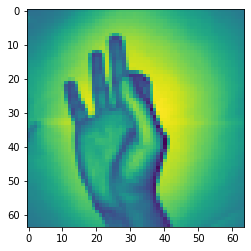

In [50]:
plt.imshow(X[0])
plt.show()

In [51]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]]
print(Ydf.columns)
print(Ydf.loc[0].idxmax())

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
9


In [52]:
Ydf[range(10)]

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2058,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
Ydf[['class']]

,class
0,C9
1,C9
2,C9
3,C9
4,C9
...,...
2057,C0
2058,C0
2059,C0
2060,C0


In [54]:
X_flat = np.array(X).reshape((2062, 64*64))

In [55]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_flat)

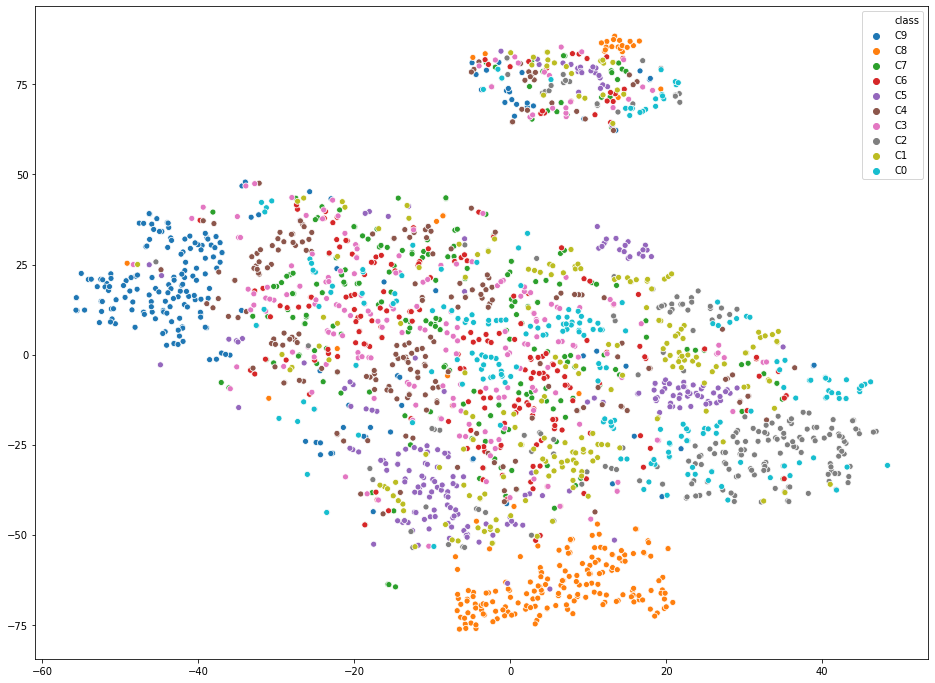

In [70]:
plt.figure(figsize=(16,12))
ax =sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=Ydf['class'])

In [71]:
umap_reducer = umap.UMAP()
X_umap = umap_reducer.fit_transform(X_flat)

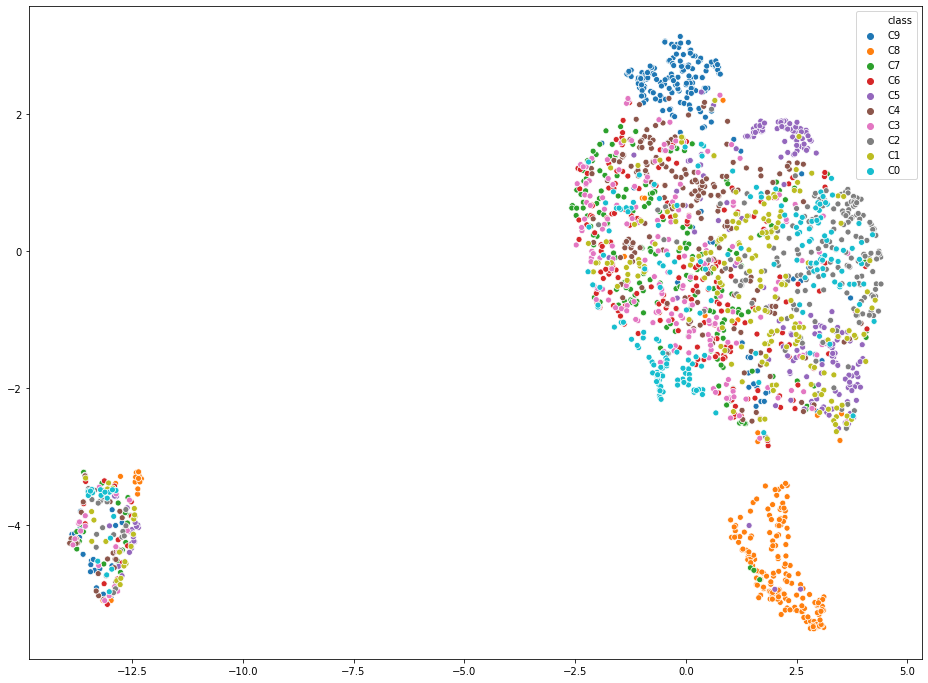

In [72]:
plt.figure(figsize=(16,12))
ax =sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=Ydf['class'])